In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt
import statsmodels.api as sm
import random
import io
import warnings
from sklearn import preprocessing
from sklearn.decomposition import PCA
from plotnine import *
import seaborn as sns
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [ ]:

from google.colab import files
uploaded = files.upload()



Saving River_Arno.csv to River_Arno.csv
Saving Water_Spring_Amiata.csv to Water_Spring_Amiata.csv
Saving Water_Spring_Lupa.csv to Water_Spring_Lupa.csv
Saving Water_Spring_Madonna_di_Canneto.csv to Water_Spring_Madonna_di_Canneto.csv


In [ ]:
df_River_Arno = pd.read_csv(io.BytesIO(uploaded['River_Arno.csv'])).sort_index()
df_Amiata = pd.read_csv(io.BytesIO(uploaded['Water_Spring_Amiata.csv'])).sort_index()
df_Lupa = pd.read_csv(io.BytesIO(uploaded['Water_Spring_Lupa.csv'])).sort_index()
df_Madonna = pd.read_csv(io.BytesIO(uploaded['Water_Spring_Madonna_di_Canneto.csv'])).sort_index()



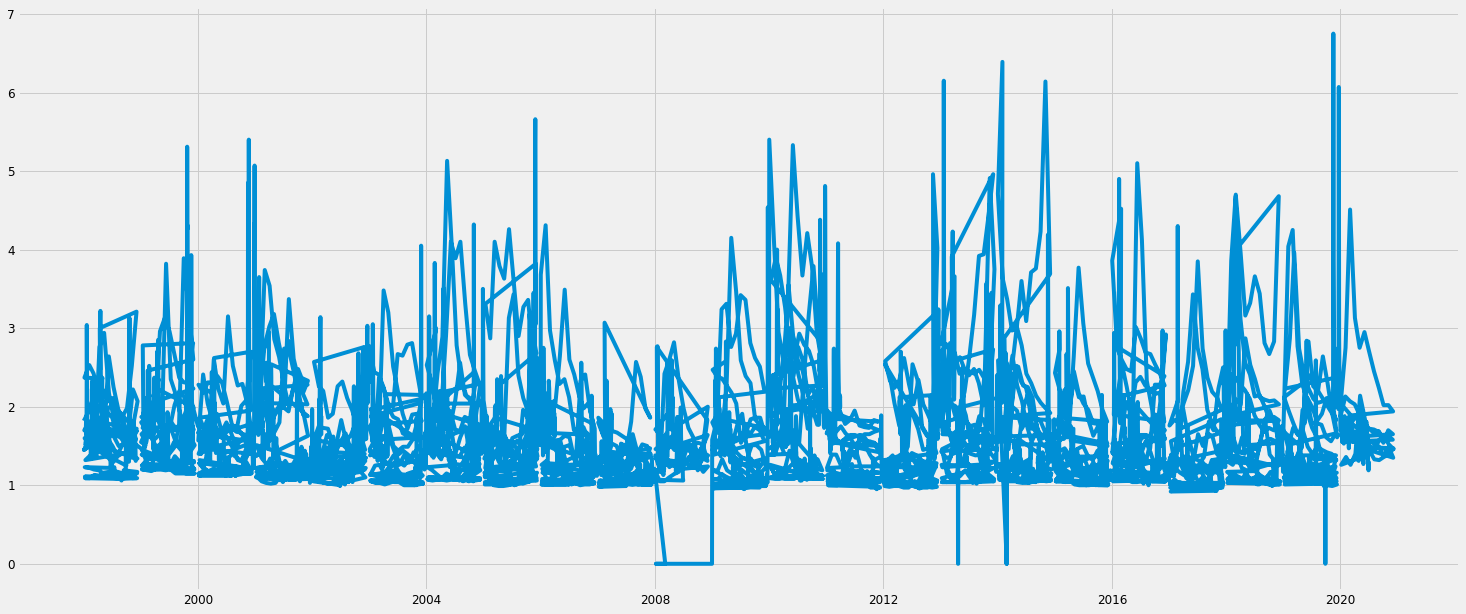

In [ ]:
from statsmodels.graphics import tsaplots

df_River_Arno_Prediction = pd.DataFrame(df_River_Arno.Hydrometry_Nave_di_Rosano)
Date = pd.to_datetime(df_River_Arno.Date)
df_River_Arno_Prediction.index = list(Date)
df_River_Arno_Prediction = df_River_Arno_Prediction.dropna()

# Display the autocorrelation plot of your time series
# fig = tsaplots.plot_acf(df_River_Arno.Hydrometry_Nave_di_Rosano, lags=24)
fig, ax = plt.subplots(figsize=(23, 10))
plt.plot(df_River_Arno_Prediction.index, df_River_Arno_Prediction.Hydrometry_Nave_di_Rosano)
plt.show()


In [ ]:
import datetime as dt
import math

# CYCLIC COLUMNS FOR DAY OF YEAR
day_disc = df_River_Arno['DISCOVERY_DOY']
day_norm = 2 * math.pi * day_disc / day_disc.max()
clean_data_v1["cyclic_day_of_year"] = np.cos(day_norm)
clean_data_v1.drop(['DISCOVERY_DOY'], axis=1)

# CYCLIC COLUMNS FOR DAY OF WEEK 
discovery_date = pd.to_datetime(clean_data_v1['DISCOVERY_DATE'], unit="D", origin="julian")
day_of_week = discovery_date.dt.dayofweek
week_day_norm = 2 * math.pi * day_of_week
clean_data_v1["cyclic_day_of_week"] = np.cos(day_of_week / 6)
clean_data_v1.drop(['DISCOVERY_DATE'], axis=1)

# CYCLIC COLUMNS FOR MONTH 
month_of_year = pd.DatetimeIndex(discovery_date).month
month_of_year_norm = 2 * math.pi * (month_of_year-1)
clean_data_v1["cyclic_month_of_year"] = np.cos(month_of_year_norm / 11)

# print(df_River_Arno.shape)
# print(df_River_Arno.dropna().shape)

# 25.7.2000 start tempriture
# 1.1.2004 start other param

(8217, 17)
(1276, 17)


,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.00000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,2.867555,2.377429,2.362853,3.097806,2.255486,3.035737,2.54953,3.431818,2.090752,2.081975,2.428213,2.105956,2.519592,3.842947,16.047688,1.490282
std,7.404714,6.458453,6.193672,8.201614,5.890147,8.537043,6.51870,8.960505,5.888406,6.335634,7.245808,6.391857,7.123253,9.614272,7.255555,0.557755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.700000,0.980000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.250000,1.090000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,1.335000
75%,0.800000,0.400000,0.800000,1.400000,0.800000,1.000000,1.00000,2.200000,0.400000,0.400000,0.650000,0.400000,0.800000,2.400000,21.900000,1.660000
max,56.000000,54.600000,53.800000,108.600000,50.400000,95.000000,63.00000,114.400000,56.600000,75.000000,123.200000,95.600000,77.400000,103.600000,30.950000,5.660000


In [ ]:
Date = df_River_Arno.Date

In [ ]:
df_River_Arno_Prediction = pd.DataFrame(df_River_Arno.Hydrometry_Nave_di_Rosano)
df_River_Arno_Prediction.index = Date
df_River_Arno_Prediction = df_River_Arno_Prediction.dropna()
df_River_Arno_Prediction

,Hydrometry_Nave_di_Rosano
Date,
01/01/1998,1.82
02/01/1998,1.94
03/01/1998,2.11
04/01/1998,1.84
05/01/1998,1.88
...,...
26/06/2020,1.34
27/06/2020,1.21
28/06/2020,1.30


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# split into train and test sets
X = df_River_Arno_Prediction.shape[0]
size = int(X * 0.66)
train, test = df_River_Arno_Prediction.Hydrometry_Nave_di_Rosano[0:size], df_River_Arno_Prediction.Hydrometry_Nave_di_Rosano[size:X]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))

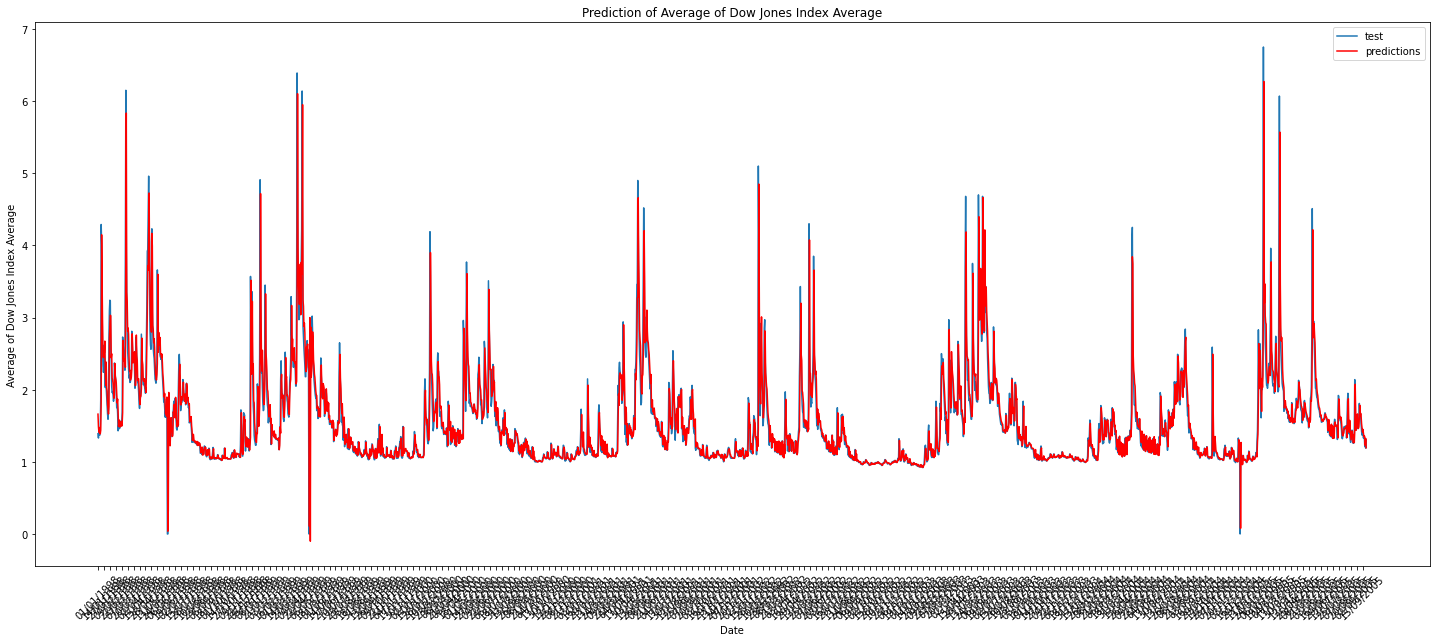

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot(test, label="test")
plt.plot(predictions, color='red', label="predictions")
ax.set_xticklabels(df_River_Arno_Prediction.index)
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
ax.set_xticks(ticks[::13])
ax.set_xticklabels(labels[::13])
ax.set(xlabel="Date",
       ylabel="Average of Dow Jones Index Average",
       title="Prediction of Average of Dow Jones Index Average")
ax.legend()
_=plt.xticks(rotation=45) 
plt.show()

In [ ]:
print(df_Amiata.shape)
print(df_Amiata.dropna().shape)


(7487, 16)
(923, 16)


In [ ]:
print(df_Lupa.shape)
print(df_Lupa.dropna().shape)



(4199, 3)
(3817, 3)


In [ ]:
print(df_Madonna.shape)
print(df_Madonna.dropna().shape)

(3113, 4)
(879, 4)
